<a href="https://colab.research.google.com/github/ragalaa/Directory/blob/master/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
import pandas as pd
from os import listdir, walk, remove
import csv
from sklearn import datasets, svm, metrics, utils
from skimage import data
from skimage.transform import rotate


def convert_to_bw(path, name):
    # for example convert_to_bw("Images\\", "ONE.JPG")
    image_file = Image.open(path+name) # Open colour image
    image_file = image_file.convert("L") # Convert the image to b&w
    image_file.save(path+"BW_"+name)
    remove(path+name)
    return path+"BW_"+name

def convert_to_png(path, name):
    image_file = Image.open(path+name)
    image_file.save(path + name[:-4]+".png")
    remove(path+name)
    return name[:-4]+".png"

# def process_image(image_file, count):
#     """Process Image
#     :image_file: <str> Name of file to be processed.
#     :count: <str> The processed file will be saved by this count (as name) 
#     :return: <list<float>> The image px values as a numpy array 
#     Example:
#     for i in len(images):
#         process_image(images[i], i)
        
#     """
#     OUTPUT_PATH = "./Processed/"
#     INPUT_PATH = "./WelcomeScan.jpg"
#     WIDTH = 100
#     HEIGHT = 100
#     EXT = ".jpg"
#     target = 0
#     #image_path = INPUT_PATH + image_file

#     if image_file.find("_EMP")!=-1 :
#         target = 1

#     # Step 0: Convert to png and to b&w
#     png_name = convert_to_png(INPUT_PATH, image_file)
#     image_path = convert_to_bw(INPUT_PATH, png_name)

#     # Step 1: image_file = "pic.jpg" Open with Pillow
#     im1 = Image.open(image_path)

#     # If not width == height, resize (check params..)
#     width_1, height_1 = im1.size
#     if width_1 > height_1:
#         diff = width_1-height_1
#         im1.crop((diff/2, 0, diff/2, height_1))
#     elif width_1 < height_1:
#         diff = height_1-width_1
#         im1.crop((0, diff/2, width_1, diff/2))
    
#     # Step 2: Use antialias filter to apply resize
#     im2 = im1.resize((WIDTH, HEIGHT), Image.ANTIALIAS)

#     # Save
#     im2.save(OUTPUT_PATH+count+"_"+str(target)+EXT)

#     # Return numpy array
#     img_np = np.array(list(im2.getdata(band=0)), float)
#     img_np = img_np.reshape([10000, 1])
#     return target, img_np

# def process_all():
#     """
#     Process All
#     Example:
#     process_all()
#     Requires that the same directory contains folders Images and Processed. Will give you 100x100px, grayscale, cropped variants of your pics.
        
#     """

#     images = []
#     targets = []
#     image_numpys = np.empty([10000 , 1])
#     IMAGE_PATH = './Images'

#     for (dirpath, dirnames, filenames) in walk(IMAGE_PATH):
#         images.extend(filenames)

#     for i in range(len(images)):
#         if images[i].find("BW_") == -1:
#             (target, nump) = process_image(images[i], str(i))
#             nump = np.transpose(nump)
#             targets.append(target)
#             #image_numpys.append(nump)
#             if i == 0:
#                 image_numpys = nump
#             else:
#                 image_numpys = np.concatenate((image_numpys, nump))

#     np.savetxt("pot.csv", image_numpys, fmt="%.2f", delimiter=",")
#     np.savetxt("targets.csv", targets)
#     # df = pd.DataFrame(data=image_numpys, index=None)
#     # df.to_csv("coffeecsv.csv", header=None, index=None)

#     print("Successfully processed {} files.".format(len(images)))
#     print("You get a numpy array with length {}.".format(len(image_numpys)))

# def image_generator(image, rotation):
#     return rotate(image, rotation, mode="symmetric")


# def load_data(imgfilepath, targetfilepath):
#     saveddata = np.loadtxt(imgfilepath,delimiter=',')
#     target = np.loadtxt(targetfilepath,delimiter=',')
#     images=[]
#     flat_data = []

#     # need to still add target and descr
#     #target=[]
#     descr = []


#     fig = plt.figure()

#     count = 0
#     cols = 20
#     n_images = len(saveddata)*2

#     for i in saveddata:

#         # reshape the image from 10000*1 to 100*100
#         i = i.reshape([100, 100])

#         # we rotate the image
#         i = image_generator(i, 180)
#         images.append(i)

#         # add flat data to array
#         # reshape the image from 10000*1 to 100*100
#         i = i.reshape([10000, ])
#         if len(flat_data) == 0:
#             flat_data = i
#         else:
#             flat_data = np.vstack([flat_data, i])



#     rottargets = []
#     rotdata = []
#     targetnew = []
#     # count = 0

#     # run this multiple times to create random angle images
#     for x in xrange(5):
#         for t, i in zip(target, saveddata):
#             # reshape the image from 10000*1 to 100*100
#             i = i.reshape([100, 100])

#             # we rotate the image at random angle
#             rotation = np.random.randint(1, 359)
#             i = image_generator(i, rotation)
#             # add the image to list of images
#             images.append(i)

#             # now we can add the targets
#             i = i.reshape([10000,])
#             # flat_data.append(i)
#             flat_data = np.vstack([flat_data, i])

#             # add target for the image
#             targetnew.append(t)

#     target = np.concatenate([target,np.array(targetnew, float)])

#     # plot it
#     #fig.set_size_inches(np.array(fig.get_size_inches()) * (n_images-1))
#     fig.tight_layout()
#     # uncomment this to show image
#     #plt.show()

#     return utils.Bunch(data=flat_data, target=target, target_names=np.arange(10),images=images, DESCR=descr)

# # uncomment this when u want to process images
# # process_all()

# load data

In [12]:
# def process_image(image_file, count):
    """Process Image
    :image_file: <str> Name of file to be processed.
    :count: <str> The processed file will be saved by this count (as name) 
    :return: <list<float>> The image px values as a numpy array 
    Example:
    for i in len(images):
        process_image(images[i], i)
        
    """
    OUTPUT_PATH = "./Processed/"
    INPUT_PATH = "./WelcomeScan.jpg"
    WIDTH = 100
    HEIGHT = 100
    EXT = ".jpg"
    target = 0
    #image_path = INPUT_PATH + image_file

    if image_file.find("_EMP")!=-1 :
        target = 1

    # Step 0: Convert to png and to b&w
    png_name = convert_to_png(INPUT_PATH, image_file)
    image_path = convert_to_bw(INPUT_PATH, png_name)

    # Step 1: image_file = "pic.jpg" Open with Pillow
    im1 = Image.open(image_path)

    # If not width == height, resize (check params..)
    width_1, height_1 = im1.size
    if width_1 > height_1:
        diff = width_1-height_1
        im1.crop((diff/2, 0, diff/2, height_1))
    elif width_1 < height_1:
        diff = height_1-width_1
        im1.crop((0, diff/2, width_1, diff/2))
    
    # Step 2: Use antialias filter to apply resize
    im2 = im1.resize((WIDTH, HEIGHT), Image.ANTIALIAS)

    # Save
    im2.save(OUTPUT_PATH+count+"_"+str(target)+EXT)

    # Return numpy array
    img_np = np.array(list(im2.getdata(band=0)), float)
    img_np = img_np.reshape([10000, 1])
#     return target, img_np

NameError: ignored

In [79]:
# def convert_to_bw(path, name):
    # for example convert_to_bw("Images\\", "ONE.JPG")
    image_file = Image.open('./WelcomeScan.jpg') # Open colour image
#     image_file = image_file.convert("L") # Convert the image to b&w
#     image_file.save('./'+"BW_"+'.Jpg')

# width_1 = image_file.rotate()

# set_Array = np.array(image_file)
# img_np = np.array(list(image_file.getdata(band=2)), float)

# im2 = image_file.resize((100, 100), Image.ANTIALIAS)
# im2.save('./'+"RESIZE_"+'.Jpg')
# # img_np = img_np.reshape([3, 2])


### reshape the image from 10000*1 to 100*100
# i = image_file.reshape([100, 100])
#### we rotate the image at random angle

loadedImage = np.loadtxt()
# rotation = np.random.randint(1, 359)
# Im3 = rotate(image_file, rotation, mode="symmetric")
# im3.save('./'+"Rotate_"+'.Jpg')
#### set_Array
img_np.dtype
# print(width_1)
   
### Convert to PNG..
#     name = "test"
#     image_file = Image.open('./WelcomeScan.jpg')
#     image_file.save('./' + name +'.png')
    
#     remove(path+name)
#     return path+"BW_"+name

UnicodeDecodeError: ignored

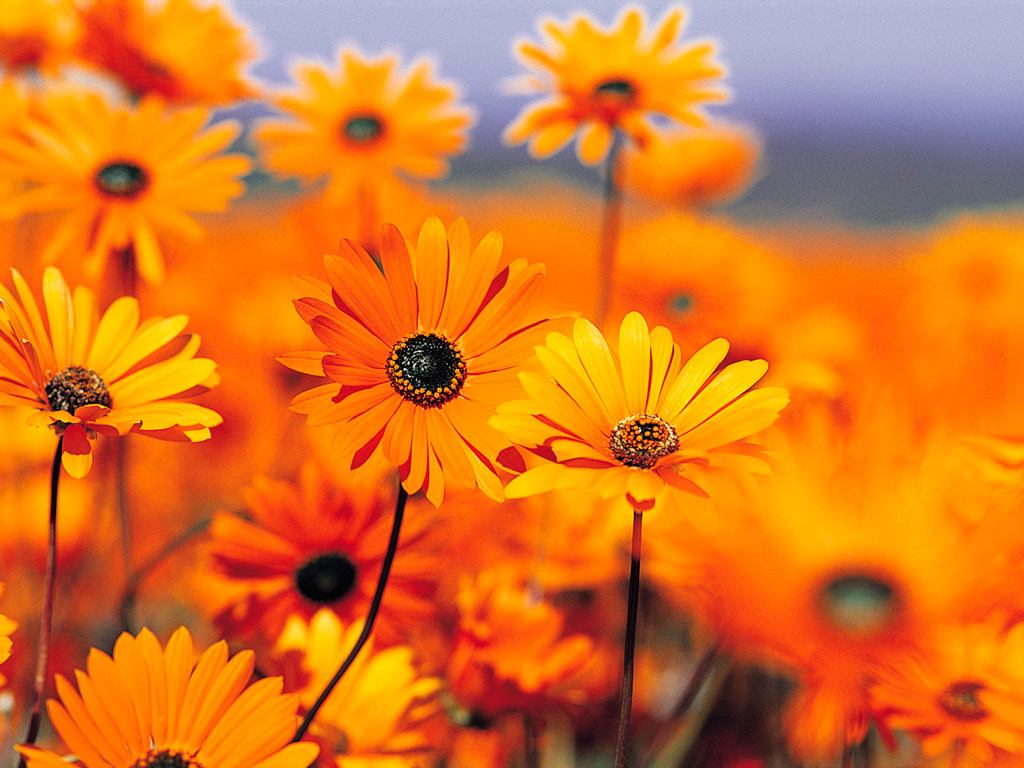

In [33]:
image_file


